## Exploratory Data Analysis (EDA) - CO₂ Emission per Capita in ASEAN
Data Sources: Global Carbon Budget (2024)Population based on various sources (2024) – with major processing by Our World in Data

Objectives 
1. Assesing CO2 Emission per Capita in ASEAN.
2. Visualize and compare the latest per capita emissions across ASEAN.
3. Analyze temporal correlations between economic growth and emission patterns.
4. Identify countries leading or lagging in emission reduction progress.
5. Gain insight that can support discussions around sustainable development and decarbonization policies in Southeast Asia.

In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [29]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (10, 5)

# Load dataset
df = pd.read_csv('co2_emission_asean_clean.csv')

df.head()

,country,year,co2_per_capita
0,Brunei,1933,0.106975
1,Brunei,1934,1.244213
2,Brunei,1935,0.703475
3,Brunei,1936,2.045512
4,Brunei,1937,5.286885


## 1. Dataset Overview and Basic Statistics

Before visualizing, it’s crucial to understand the dataset’s overall structure - including data types, completeness, and distribution of observations.

In [ ]:
# Basic info
df.info()
print("\nShape:", df.shape)

# Summary Statistics
df.describe()

print("\nCountries in dataset:", df['country'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1003 non-null   object 
 1   year            1003 non-null   int64  
 2   co2_per_capita  1003 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB

Shape: (1003, 3)

Countries in dataset: ['Brunei' 'Cambodia' 'Indonesia' 'Laos' 'Malaysia' 'Myanmar' 'Philippines'
 'Singapore' 'Thailand' 'Vietnam']


We examine the number of rows and columns, check for null values, and summarize numerical statistics. This helps confirm the data integrity and ensures that no anomalies remain before deeper analysis.

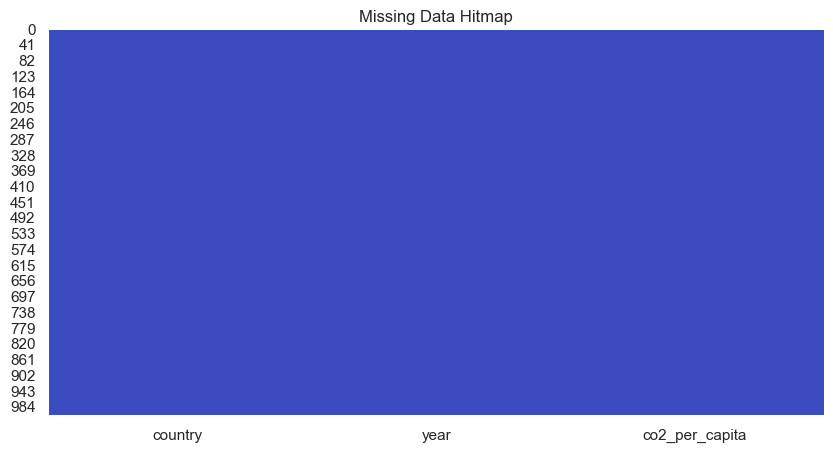

In [31]:
sns.heatmap(df.isna(), cbar=False, cmap='coolwarm')
plt.title("Missing Data Hitmap")
plt.show()

All entries in the dataset are present - there are no missing or null values to clean

## 2. Data coverage per country
Since each ASEAN country’s dataset begins at a different year, we evaluate the temporal coverage of available data.
This allows us to understand which countries have long-term historical records versus those with more recent observations.


In [32]:
coverage = df.groupby("country")["year"].agg(["min", "max", "count"]).reset_index()
coverage.columns = ["country", "start_year", "end_year", "num_records"]
coverage


,country,start_year,end_year,num_records
0,Brunei,1933,2023,91
1,Cambodia,1955,2023,69
2,Indonesia,1889,2023,135
3,Laos,1955,2023,69
4,Malaysia,1890,2023,133
5,Myanmar,1928,2023,96
6,Philippines,1907,2023,114
7,Singapore,1950,2023,74
8,Thailand,1931,2023,90
9,Vietnam,1892,2023,132


### 2.1 Number of Available Data Points per Country

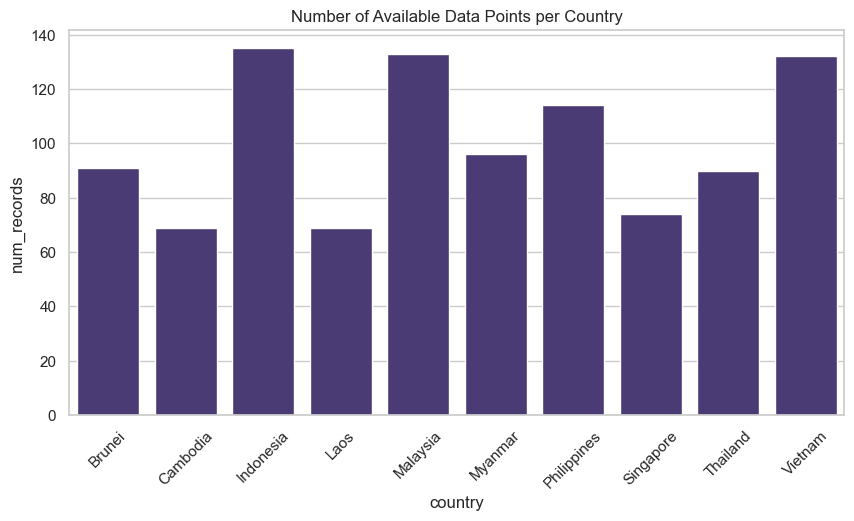

In [33]:
sns.barplot(data=coverage, x="country", y="num_records")
plt.title("Number of Available Data Points per Country")
plt.xticks(rotation=45)
plt.show()


## 3. CO₂ Emission per Capita Trends Across ASEAN (Historical Perspective)


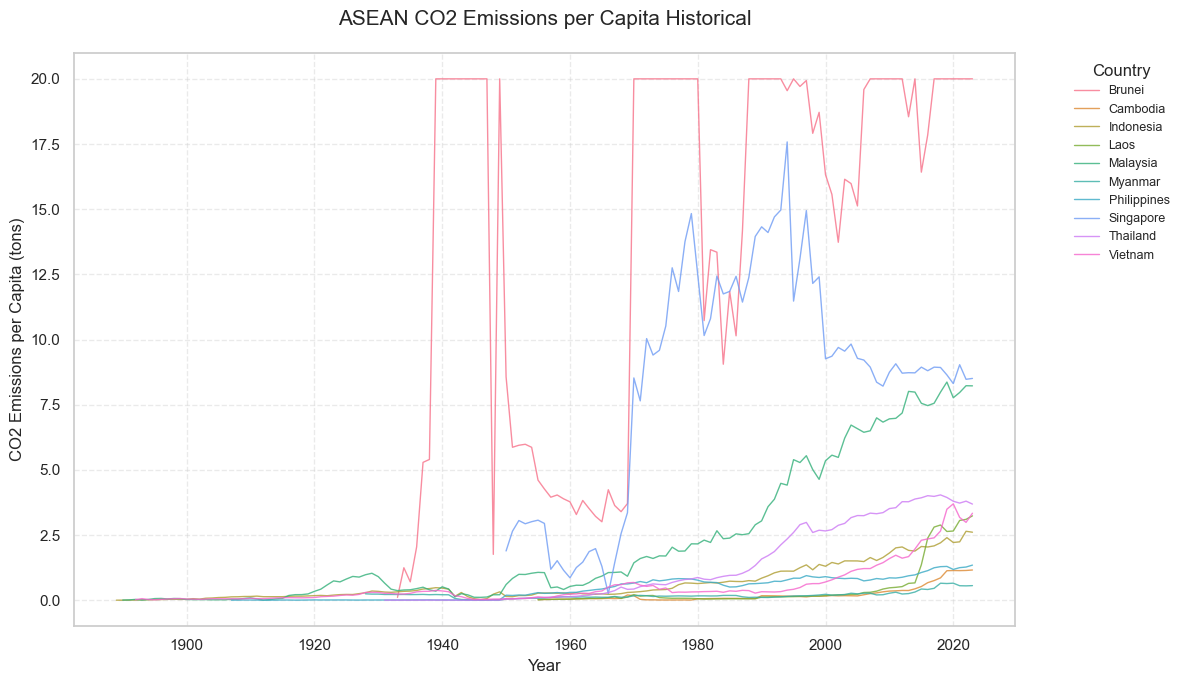

In [48]:
plt.figure(figsize=(12, 7))

df_plot = df.copy()
df_plot["co2_per_capita"] = np.where(df_plot["co2_per_capita"] > 20, 20, df_plot["co2_per_capita"])

sns.lineplot(
    data=df_plot,
    x="year", y="co2_per_capita",
    hue="country",
    linewidth=1,          
    alpha=0.8             
)

plt.title("ASEAN CO2 Emissions per Capita Historical", fontsize=15, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions per Capita (tons)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9, frameon=False)

plt.ylim(0, df_plot["co2_per_capita"].max() * 1.1)
plt.autoscale(enable=True, axis='y', tight=False)

plt.tight_layout()
plt.show()



This time-series visualization illustrates the evolution of CO₂ emissions per capita across ASEAN nations from the early 1900s to 2024.
Brunei shows exceptionally high and volatile emissions-exceeding 200 tonnes per person at historical peaks-driven by its small population and oil-export-based economy.
Singapore ranks second, maintaining high but recently stabilizing emissions due to its refining and petrochemical sectors, dense energy demand, and growing efficiency initiatives.
Malaysia demonstrates a steady rise followed by a gradual flattening trend, reflecting industrial growth and the early adoption of cleaner energy strategies.
Thailand, Vietnam, and Indonesia fall into the middle range, with moderate but increasing emissions aligned with industrial expansion and urbanization.
Meanwhile, Laos, Cambodia, Myanmar, and the Philippines remain low emitters, though their gradual upward trends indicate progressing industrialization and expanding energy access.
Overall, the data highlights a wide regional disparity-from fossil-dependent economies to emerging nations still developing their energy infrastructure.

## 4. Comparative View for the Most Recent Year


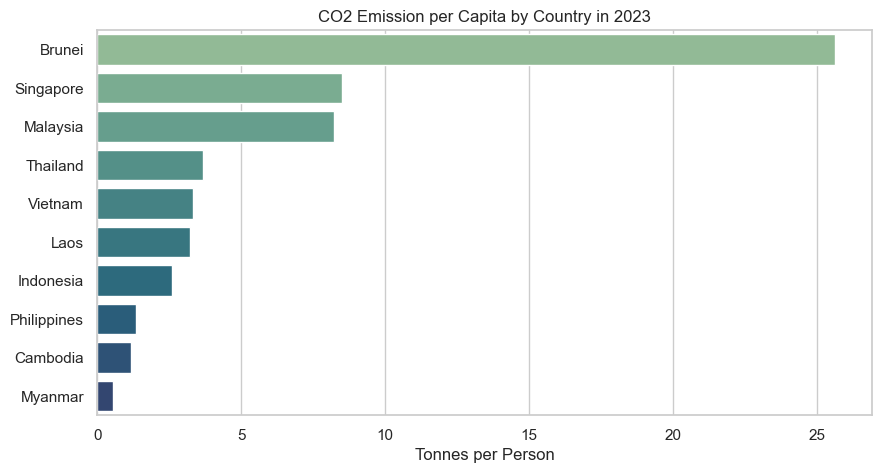

In [40]:
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year]

sns.barplot(data=df_latest.sort_values("co2_per_capita", ascending=False),
            x="co2_per_capita", y="country", palette="crest")

plt.title(f"CO2 Emission per Capita by Country in {latest_year}")
plt.xlabel("Tonnes per Person")
plt.ylabel("")
plt.show()


The 2023 chart reveals significant disparities in carbon intensity across ASEAN nations:
- Brunei records by far the highest per capita emissions, exceeding 25 tonnes per person. This reflects its oil-export-oriented economy, small population, and energy-intensive industries.
- Singapore and Malaysia follow, with emissions around 8–9 tonnes per person, driven by refining, petrochemical production, and industrial energy demand.
- Thailand, Vietnam, and Laos occupy the mid-range, each between 3-4 tonnes per person, consistent with industrial expansion and increased electricity consumption.
- Indonesia, despite being one of the region’s largest emitters in total terms, shows relatively low per capita emissions (~2–3 tonnes) due to its large population base.
- The Philippines, Cambodia, and Myanmar remain the lowest emitters, below 2 tonnes per person, reflecting slower industrialization and greater reliance on lower-emission energy sources.
- Overall, the data underscores a strong correlation between industrial maturity and per capita emissions, while highlighting the regional imbalance in energy development and carbon output.

## 5. Trend Analysis and Annual Change


In [41]:
# Calculate average growth in emissions per country
trend = (
    df.groupby("country")
      .apply(lambda x: (x["co2_per_capita"].iloc[-1] - x["co2_per_capita"].iloc[0]) / len(x))
      .reset_index(name="avg_annual_change")
)

trend.sort_values("avg_annual_change", ascending=False)


,country,avg_annual_change
0,Brunei,0.280628
7,Singapore,0.089447
4,Malaysia,0.061786
3,Laos,0.046688
8,Thailand,0.040945
9,Vietnam,0.025125
2,Indonesia,0.019315
1,Cambodia,0.016480
6,Philippines,0.011793
5,Myanmar,0.003275


This table measures the average yearly change in CO₂ emissions per capita for each ASEAN member, offering insight into the pace of emissions growth over time.
Overall, the data highlights uneven progress across ASEAN, where smaller, oil-driven economies experience the fastest emission growth, while larger and developing nations maintain slower but consistent increases tied to economic modernization.

## 6. Distribution of CO₂ Emission per Capita

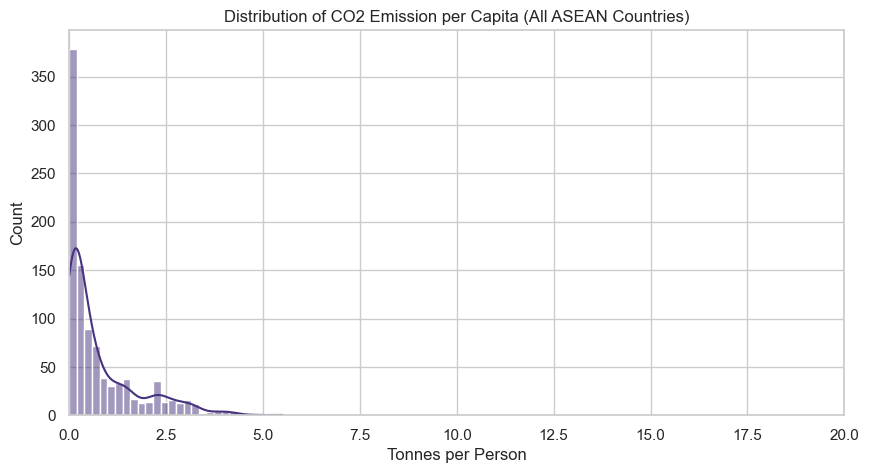

In [43]:
sns.histplot(np.log1p(df['co2_per_capita']), kde=True) 
plt.title("Distribution of CO2 Emission per Capita (All ASEAN Countries)")
plt.xlabel("Tonnes per Person")
plt.xlim(0, 20)
plt.show()


Most data points are concentrated at the lower emission range (0–3 tonnes per person), showing that a majority of ASEAN countries contribute relatively small amounts of CO₂ on a per-person basis.

However, the distribution is heavily right-skewed, indicating that a few countries - particularly Singapore, Brunei, and Malaysia - have significantly higher per-capita emissions compared to their regional peers.

This skewness highlights the economic and industrial disparities among ASEAN nations:

- Low emitters (e.g., Cambodia, Laos, Myanmar) typically have smaller industrial sectors and lower energy consumption per capita.

- High emitters (e.g., Singapore, Brunei) tend to have more energy-intensive industries and higher income levels, contributing to elevated emissions despite smaller populations.

In summary, while the ASEAN region overall remains a relatively low emitter per capita, a few economically advanced members account for a disproportionate share of per-person emissions.

## 7. Correlation Between Year and CO₂ per Capita (Temporal Trend Strength)

In [ ]:
corrs = df.groupby("country")[["year", "co2_per_capita"]].corr().iloc[0::2,-1].reset_index()
corrs.columns = ["country", "_", "corr_year_co2"]
corrs = corrs[["country", "corr_year_co2"]]
corrs.sort_values("corr_year_co2", ascending=False)


,country,corr_year_co2
6,Philippines,0.948206
8,Thailand,0.934306
4,Malaysia,0.869792
2,Indonesia,0.853304
1,Cambodia,0.750245
9,Vietnam,0.712317
3,Laos,0.664276
5,Myanmar,0.587089
7,Singapore,0.550249
0,Brunei,-0.088670


The correlation between year and CO₂ per Capita showing clearly:

- Philippines, Thailand, Malaysia, and Indonesia show very strong positive correlations, suggesting a steady and significant increase in CO₂ emissions per capita across the years.

- Cambodia, Vietnam, and Laos display moderate positive trends, indicating gradual but consistent emission growth alongside economic and industrial development.

- Singapore and Brunei are outliers: Singapore shows only a mild increase, while Brunei’s slightly negative correlation suggests a possible stabilization or reduction in emissions - likely tied to early adoption of cleaner technologies or mature industrial transitions.

## 8. Policy and Sustainabilty implications

The strong upward correlation for most ASEAN countries signals that economic growth remains tightly linked with carbon emissions. This highlights the urgent need for decarbonization strategies that can delink growth from fossil-fuel dependency.

To address this, ASEAN policymakers and energy planners could focus on:

- Accelerating renewable energy adoption - particularly in the Philippines, Thailand, and Indonesia, which rely heavily on coal and natural gas.

- Enhancing regional carbon capture and storage (CCS) cooperation to mitigate industrial emissions.

- Implementing carbon pricing mechanisms and emission-trading schemes to encourage low-carbon innovation.

- Promoting energy efficiency programs in the manufacturing and transport sectors, which contribute a large share of emissions growth.

- Knowledge and technology sharing from early decarbonizers such as Singapore and Brunei to neighboring developing states.

To meet global climate goals and national net-zero pledges, collective action toward renewable integration, efficiency, and carbon governance must become a policy priority across the region.